<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</b>
       * Очистка и подготовка данных
       * Пробразования данных: слияние, комбинирование и смена размерности
       * Комбинирование и слияние наборов данных

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Общее

#### Пропуски
* Исходные данные редко (почти никогда) не бывает "чистыми"
* Основновными проблемами являются: __пропуски__ и __выбросы__
* Работа с неполными данными может быть организована __по разному__
* От того, как мы будем работать с этим зависит __качество__ последующей обработки
* Существенную помощь в заполнении данных оказывают __статистика__ и __графики__

#### Отчеты
* Отчет - это __"лицо"__ проведенной работы
* (очень) Усредненно отчет по данным состоит из:
    - описания __входных__ данных
    - основной части с __графиками__ и __таблицами__
    - выводов
* Наиболее распространенный элемент отчета - __сводная таблица__
* Для построения таблицы используются функции __группировки__ и __агрегирования (агрегации)__

#### Преобразования
* данные редко "доживают" до конца в неизменном виде, "перетекая" между различными датафреймами, массивами и сериями с сохранением исходного значения
* это происходит за счет __реиндексации__, __слияний__, __разделений__, __преобразование размерности__, __преобразований строк и столбцов__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import os
from numpy.random import randn
%matplotlib inline

In [2]:
import os
import os.path

## Загрузите данные с kaggle

In [3]:
# https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

In [4]:
df = pd.read_csv('hourly-weather-surface-brazil-southeast-region.zip')

In [5]:
df.head(5)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [6]:
df.shape

(9779168, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
wsid    int64
wsnm    object
elvt    float64
lat     float64
lon     float64
inme    object
city    object
prov    object
mdct    object
date    object
yr      int64
mo      int64
da      int64
hr      int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
dewp    float64
tmax    float64
dmax    float64
tmin    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


In [8]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,1.407984e+06,9.779168e+06,...,9.779142e+06,9.778858e+06,9.779134e+06,9.778361e+06,9.779168e+06,9.779156e+06,9.779124e+06,8.853607e+06,9.779168e+06,9.462694e+06
mean,3.592531e+02,5.940923e+02,-2.023082e+01,-4.464590e+01,2.011164e+03,6.521960e+00,1.575465e+01,1.150000e+01,9.366544e-01,8.804292e+02,...,2.110503e+01,1.524025e+01,1.986418e+01,1.422089e+01,6.726667e+01,6.996991e+01,6.441965e+01,1.998156e+00,1.385991e+02,4.494015e+00
std,3.901630e+01,3.980379e+02,3.172643e+00,4.882117e+00,3.207774e+00,3.425538e+00,8.802154e+00,6.922190e+00,2.923291e+00,2.482650e+02,...,7.545549e+00,5.866811e+00,7.134849e+00,5.777089e+00,2.654213e+01,2.643371e+01,2.656550e+01,1.618531e+00,1.052018e+02,2.981790e+00
min,1.780000e+02,0.000000e+00,-2.496282e+01,-5.667732e+01,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.200000e+00,-1.000000e+01,-8.500000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.280000e+02,2.830000e+02,-2.239580e+01,-4.743410e+01,2.009000e+03,4.000000e+00,8.000000e+00,5.000000e+00,0.000000e+00,9.113000e+02,...,1.820000e+01,1.270000e+01,1.720000e+01,1.160000e+01,5.300000e+01,5.800000e+01,4.900000e+01,8.000000e-01,5.600000e+01,2.300000e+00
50%,3.580000e+02,5.730000e+02,-2.075041e+01,-4.445378e+01,2.011000e+03,7.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,9.442000e+02,...,2.190000e+01,1.660000e+01,2.080000e+01,1.560000e+01,7.400000e+01,7.800000e+01,7.000000e+01,1.700000e+00,1.140000e+02,4.200000e+00
75%,3.940000e+02,8.750000e+02,-1.891707e+01,-4.243575e+01,2.014000e+03,9.000000e+00,2.300000e+01,1.800000e+01,6.000000e-01,9.731000e+02,...,2.580000e+01,1.940000e+01,2.420000e+01,1.840000e+01,8.900000e+01,9.100000e+01,8.600000e+01,2.900000e+00,2.160000e+02,6.300000e+00
max,4.230000e+02,1.758000e+03,0.000000e+00,0.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,1.050000e+03,...,4.500000e+01,4.480000e+01,4.500000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.980000e+01,3.600000e+02,5.000000e+01


## <font color=red>ЗАДАНИЕ</font>

Какие поля в describe "бесполезны" и почему?

In [9]:
df.wsid.unique()

array([178, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
       328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
       367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
       380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
       393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
       406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420, 421, 422, 423])

## <font color=red>ЗАДАНИЕ</font>

Выведите графики средней температуры и средней влажности на метеостанции 383 зависимости от даты либо в двух смежных графиках, либо на одном с правой и левой осями

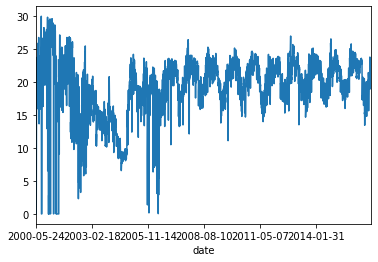

In [10]:
mean = df.groupby('date')['temp'].mean().plot()

## Очистка и подготовка данных

### Работа пропущенных данных

In [11]:
string_data = pd.Series(['дыня', 'тыква', np.nan, 'помидор'])
string_data

0       дыня
1      тыква
2        NaN
3    помидор
dtype: object

In [12]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [13]:
string_data

0       None
1      тыква
2        NaN
3    помидор
dtype: object

### Фильтрация пропущенных данных

In [14]:
from numpy import nan as NA

data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [15]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [16]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [17]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [18]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [19]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [20]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [21]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,1.136787,NaN,NaN
1,0.947255,NaN,NaN
2,0.059434,NaN,-0.118907
3,-0.026732,NaN,0.075077
4,-0.403221,-0.362032,-1.879578
5,0.221332,0.052874,-0.656268
6,-0.934983,1.163659,0.333091


In [22]:
df.dropna()
df.dropna(thresh=2)

,0,1,2
2,0.059434,NaN,-0.118907
3,-0.026732,NaN,0.075077
4,-0.403221,-0.362032,-1.879578
5,0.221332,0.052874,-0.656268
6,-0.934983,1.163659,0.333091


### Заполнение пропущенных данных

In [23]:
df.fillna(0)

,0,1,2
0,1.136787,0.000000,0.000000
1,0.947255,0.000000,0.000000
2,0.059434,0.000000,-0.118907
3,-0.026732,0.000000,0.075077
4,-0.403221,-0.362032,-1.879578
5,0.221332,0.052874,-0.656268
6,-0.934983,1.163659,0.333091


In [24]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.136787,0.500000,0.000000
1,0.947255,0.500000,0.000000
2,0.059434,0.500000,-0.118907
3,-0.026732,0.500000,0.075077
4,-0.403221,-0.362032,-1.879578
5,0.221332,0.052874,-0.656268
6,-0.934983,1.163659,0.333091


In [25]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,1.136787,0.000000,0.000000
1,0.947255,0.000000,0.000000
2,0.059434,0.000000,-0.118907
3,-0.026732,0.000000,0.075077
4,-0.403221,-0.362032,-1.879578
5,0.221332,0.052874,-0.656268
6,-0.934983,1.163659,0.333091


In [26]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,2.052749,-1.061423,-2.455421
1,-0.453119,0.441199,0.207595
2,-0.951459,NaN,-0.533037
3,0.708541,NaN,-0.632843
4,0.219174,NaN,NaN
5,1.085870,NaN,NaN


In [27]:
df.fillna(method='ffill')

,0,1,2
0,2.052749,-1.061423,-2.455421
1,-0.453119,0.441199,0.207595
2,-0.951459,0.441199,-0.533037
3,0.708541,0.441199,-0.632843
4,0.219174,0.441199,-0.632843
5,1.085870,0.441199,-0.632843


In [28]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,2.052749,-1.061423,-2.455421
1,-0.453119,0.441199,0.207595
2,-0.951459,0.441199,-0.533037
3,0.708541,0.441199,-0.632843
4,0.219174,NaN,-0.632843
5,1.085870,NaN,-0.632843


In [29]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Преобразования данных

### Удаление дубликатов

In [30]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [31]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [32]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [33]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [34]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Преобразование данных с помощью отображения и функции

In [35]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [36]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [37]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [38]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [39]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Замена значений

In [40]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [41]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [42]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [43]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Переименование индексов осей

In [44]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [45]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [46]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [47]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [48]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [49]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Дискретизация и раскладка по "корзинам"

In [50]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [51]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [52]:
cats.codes
cats.categories
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [53]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [54]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [55]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.47, 0.69], (0.47, 0.69], (0.02, 0.24], (0.69, 0.91], (0.69, 0.91], ..., (0.69, 0.91], (0.02, 0.24], (0.69, 0.91], (0.69, 0.91], (0.47, 0.69]]
Length: 20
Categories (4, interval[float64]): [(0.02, 0.24] < (0.24, 0.47] < (0.47, 0.69] < (0.69, 0.91]]

In [56]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats
pd.value_counts(cats)

(0.735, 3.478]                   250
(-0.00231, 0.735]                250
(-0.686, -0.00231]               250
(-3.2199999999999998, -0.686]    250
dtype: int64

In [57]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.195, -0.00231], (-1.195, -0.00231], (-0.00231, 1.284], (-1.195, -0.00231], (1.284, 3.478], ..., (-1.195, -0.00231], (-1.195, -0.00231], (-1.195, -0.00231], (-0.00231, 1.284], (-0.00231, 1.284]]
Length: 1000
Categories (4, interval[float64]): [(-3.2199999999999998, -1.195] < (-1.195, -0.00231] < (-0.00231, 1.284] < (1.284, 3.478]]

### Детектирование и фильтрация выборосов

In [58]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.034243,-0.035633,0.014117,0.006035
std,1.005887,0.957556,1.058851,0.978391
min,-3.917939,-3.386042,-3.508140,-3.839775
25%,-0.702122,-0.714505,-0.745455,-0.666671
50%,-0.038006,-0.026795,0.030902,-0.015548
75%,0.615027,0.607835,0.759541,0.679649
max,3.111630,2.877441,3.245144,2.665062


In [59]:
col = data[2]
col[np.abs(col) > 3]

629    3.071728
749   -3.508140
767    3.004035
796   -3.216403
823    3.245144
Name: 2, dtype: float64

In [60]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
298,-3.385567,-0.385832,-0.265643,-0.836774
340,-3.104473,-0.584645,-0.978753,0.535161
479,3.111630,-0.632425,0.127878,-0.472943
531,-3.335423,-0.713917,-0.430779,0.623450
593,0.335210,0.816848,1.051213,-3.839775
629,0.747257,-1.121535,3.071728,-0.490692
721,-3.917939,1.681007,1.205910,0.741552
749,-1.203424,1.447843,-3.508140,-1.220463
767,1.715283,-1.053454,3.004035,-0.566074
796,-0.866376,-0.591400,-3.216403,-0.669797


In [61]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.032611,-0.035247,0.014521,0.006878
std,0.999824,0.956281,1.055701,0.975433
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.702122,-0.714505,-0.745455,-0.666671
50%,-0.038006,-0.026795,0.030902,-0.015548
75%,0.615027,0.607835,0.759541,0.679649
max,3.000000,2.877441,3.000000,2.665062


In [62]:
np.sign(data).head()

,0,1,2,3
0,-1.0,-1.0,1.0,-1.0
1,1.0,-1.0,1.0,1.0
2,-1.0,-1.0,1.0,1.0
3,-1.0,1.0,-1.0,1.0
4,1.0,1.0,1.0,1.0


### Перестановка и случайная выборка

In [63]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([3, 4, 1, 0, 2])

In [64]:
df
df.take(sampler)

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11


In [65]:
df.sample(n=3)

,0,1,2,3
4,16,17,18,19
1,4,5,6,7
2,8,9,10,11


In [66]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

3    6
4    4
3    6
3    6
3    6
3    6
3    6
4    4
0    5
2   -1
dtype: int64

### Вычисление индикативных (знаковых) переменных

In [67]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [68]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [70]:
mnames = ['movie_id', 'title', 'genres']
ml_1m = os.path.join("..", "datasets", "MovieLens", "ml-1m", "movies.dat")
#movies = pd.read_table(ml_1m, sep='::', header=None, names=mnames)
movies = pd.read_csv(ml_1m, sep='::', header=None, names=mnames, engine='python')
movies[:10]

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/MovieLens/ml-1m/movies.dat'

In [ ]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [ ]:
genres

In [ ]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [ ]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

In [ ]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

In [ ]:
np.random.seed(12345)
values = np.random.rand(10)
values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

### Векторизация строковых операций в pandas

In [71]:
import re

In [72]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [73]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [74]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [75]:
# Важно! За findall находится re, без него не заработает
import re

pattern = '.*ve'
data.str.findall(pattern, flags=re.IGNORECASE)

Dave      [dave]
Steve    [steve]
Rob           []
Wes          NaN
dtype: object

In [76]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches, type(matches)

(Dave      True
 Steve     True
 Rob      False
 Wes        NaN
 dtype: object, pandas.core.series.Series)

In [79]:
data.str.get(1)
data.str[0]

Dave       d
Steve      s
Rob        r
Wes      NaN
dtype: object

In [ ]:
data.str[:5]

## <font color=red>ЗАДАНИЕ</font>

* Какие  поля требуется заполнять
* Почему?
* Как Вы их будете заполнять?


In [ ]:
# Ваш код


## Пробразования данных: слияние, комбинирование и смена размерности

### Иерархическая индексация

In [80]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    1.191003
   2    0.305292
   3    1.428422
b  1    0.297965
   3    0.157941
c  1    0.007838
   2    1.144137
d  2    0.716933
   3    0.164718
dtype: float64

In [81]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [82]:
data['b']
data['b':'c']
data.loc[['b', 'd']]

b  1    0.297965
   3    0.157941
d  2    0.716933
   3    0.164718
dtype: float64

In [83]:
data.loc[:, 2]

a    0.305292
c    1.144137
d    0.716933
dtype: float64

In [84]:
data.unstack()

,1,2,3
a,1.191003,0.305292,1.428422
b,0.297965,NaN,0.157941
c,0.007838,1.144137,NaN
d,NaN,0.716933,0.164718


In [85]:
data.unstack().stack()

a  1    1.191003
   2    0.305292
   3    1.428422
b  1    0.297965
   3    0.157941
c  1    0.007838
   2    1.144137
d  2    0.716933
   3    0.164718
dtype: float64

In [86]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [87]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [88]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [89]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']], names=['state', 'color'])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

### Переупорядочивание и сортировка уровней

In [90]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [91]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [92]:
frame.sort_index(level=1)
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Суммарная статистика по индексу

In [93]:
frame.sum(level='key2')
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

In [94]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [95]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [96]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [97]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Комбинирование и слияние наборов данных

### Слияние в стиле реляционной СУБД

In [98]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [99]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [100]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [101]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [102]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [103]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [104]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [105]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [106]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [107]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [108]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [109]:
pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Слияние по индексу

In [110]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [111]:
right1

,group_val
a,3.5
b,7.0


In [112]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [113]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [114]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [115]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [116]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [117]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [118]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [119]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [120]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [121]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [122]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [123]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [124]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [125]:
#left2.join([right2, another], how='outer')
left2.join([right2, another], how='outer', sort=True)

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### Объединение вдоль осей

In [126]:
arr = np.arange(12).reshape((3, 4))
arr


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
np.concatenate([arr, arr], axis=1)

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])

In [ ]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [ ]:
s3 = pd.Series([5, 6], index=['f', 'g'])

In [ ]:
pd.concat([s1, s2, s3])

In [ ]:
pd.concat([s1, s2, s3], axis=1, sort=True)

In [ ]:
s4 = pd.concat([s1, s3])
s4

In [ ]:
pd.concat([s1, s4], axis=1, sort=True)

In [ ]:
pd.concat([s1, s4], axis=1, join='inner', sort=True)

In [ ]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']], sort=True)

In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [ ]:
result

In [ ]:
result.unstack()

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'], sort=True)

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], sort=True)

In [ ]:
pd.concat({'level1': df1, 'level2': df2}, axis=1, sort=True)

In [ ]:
#pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
#          names=['upper', 'lower'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'], sort=True)

In [ ]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], ignore_index=True, sort=True)

### Комбинирование данных с перекрытием

In [ ]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a

In [ ]:
b

In [ ]:
np.where(pd.isnull(a), b, a)

In [ ]:
b[:-2].combine_first(a[2:])

In [ ]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1

In [ ]:
df2

In [ ]:
df1.combine_first(df2)

## Изменение размерностей и "повороты"

### Иерархическое индексирование и reshaping

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

In [ ]:
result = data.stack()
result

In [ ]:
result.unstack()

In [ ]:
result.unstack(0)
result.unstack('state')

In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [ ]:
data2

In [ ]:
data2.unstack()

In [ ]:
data2.unstack()

In [ ]:
data2.unstack().stack()

In [ ]:
data2.unstack().stack(dropna=False)

In [ ]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

In [ ]:
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### Поворот из "длинного" в "широкий" формат

In [ ]:
data = pd.read_csv('macrodata.csv')
data.head()
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [ ]:
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

### Поворот из "широкого" в "длинный" формат

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

In [ ]:
melted = pd.melt(df, ['key'])
melted

In [ ]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

In [ ]:
reshaped.reset_index()

In [ ]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

In [ ]:
pd.melt(df, value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['key', 'A', 'B'])

## Агрегирование данных и групповые операции

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

In [ ]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
grouped.mean()

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [ ]:
means.unstack()

In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

In [ ]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

In [ ]:
df.groupby(['key1', 'key2']).size()

### Итерация по группам|

In [ ]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

In [ ]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

In [ ]:
df.dtypes
grouped = df.groupby(df.dtypes, axis=1)

In [ ]:
for dtype, group in grouped:
    print(dtype)
    print(group)

### Выбор колонок или их подмножества

```python

df.groupby('key1')['data1'] 
df.groupby('key1')[['data2']]

является более удобной формой записи (syntactit sugar) для

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])
```

In [ ]:
df.groupby(['key1', 'key2'])[['data2']].mean()

In [ ]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

### Группировка по словарям и сериям

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

In [ ]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [ ]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

In [ ]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

### Группировка с функциями

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Группировка по уровням индекса

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

### Агрегирование данных

In [ ]:
df
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

In [ ]:
grouped.describe()

### Применение функции к столбцу и применение нескольких функций

In [ ]:
tips = pd.read_csv('tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [ ]:
grouped = tips.groupby(['day', 'smoker'])

In [ ]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

In [ ]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

In [ ]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

In [ ]:
result['tip_pct']

In [ ]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

In [ ]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

### Возврат агрегированных двнных без строчных индексов

In [ ]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

## Применение: разделить - применить - скомбинировать

In [ ]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

In [ ]:
tips.groupby('smoker').apply(top)

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

In [ ]:

result = tips.groupby('smoker')['tip_pct'].describe()
result
result.unstack('smoker')

### Подавление групповых ключей

In [ ]:
tips.groupby('smoker', group_keys=False).apply(top)

### Анализ по квартилям и козинам

In [ ]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

In [ ]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

### Пример: заполнение отсутствущих значений с значениями, определенными для группы

In [ ]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

### Пример: случайная выборка и перестановки

In [ ]:

# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [ ]:
deck[:13]

In [ ]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Пример: взвешенное по группе среднее и корреляция

In [ ]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]

In [ ]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [ ]:
rets = close_px.pct_change().dropna()

In [ ]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

In [ ]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Пример: линейная регрессия по группам

In [127]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

### Сводные таблицы и таблицы с разделением полей табуляцией (crosstab)

In [ ]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
#data = pd.read_table(StringIO(data), sep='\s+')
data = pd.read_csv(StringIO(data), sep='\s+')


In [ ]:
data

In [ ]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## По следующим занятиям

### 9-е занятие: 
* тестовая EDA 
* коллоквикум по EDA на учебном примере с kaggle

### Для подготовки: 
* Внимательно пересмотреть материал это и 2 предыдущих занятия
* Посмотреть dataset и kernels для Титаника на kaggle

## Экзаменационные вопросы:
* Очистка и подготовка данных
* Пробразования данных: слияние, комбинирование и смена размерности
* Комбинирование и слияние наборов данных
* Подход "разделить - применить - скомбинировать"